In [85]:
import os
import pandas as pd
from scipy.io import mmread
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

In [92]:
#或是通过下面pandas辅助下分别导入
cellinfo = pd.read_csv('/disk1/cai026/CellOracle/HLF-Celloracle-GSM4829413/data/GSM4829413_cll_rna_filtered_barcodes.tsv',index_col=0,header = None)
geneinfo = pd.read_csv('/disk1/cai026/CellOracle/HLF-Celloracle-GSM4829413/data/GSM4829413_cll_rna_features.tsv',index_col=0,header=None)
adata = sc.read('/disk1/cai026/CellOracle/HLF-Celloracle-GSM4829413/data/GSM4829413_cll_rna_filtered_matrix.mtx',cache = False)
adata = adata.T# 转置 adata 对象，使得行表示基因，列表示细胞

In [93]:
# 查看 DataFrame 的前几行
print(geneinfo.head())

Empty DataFrame
Columns: []
Index: [ENSG00000243485	MIR1302-2HG	Gene Expression, ENSG00000237613	FAM138A	Gene Expression, ENSG00000186092	OR4F5	Gene Expression, ENSG00000238009	AL627309.1	Gene Expression, ENSG00000239945	AL627309.3	Gene Expression]


In [94]:
#基因名称列中包含了多个字段，可以用 \t 分隔符将其拆分为单独的列。
# 拆分基因名称列
geneinfo[['gene_id', 'gene_name', 'annotation']] = geneinfo.index.to_series().str.split('\t', expand=True)

# 查看 DataFrame 的前几行
print(geneinfo.head())

                                                       gene_id    gene_name  \
0                                                                             
ENSG00000243485\tMIR1302-2HG\tGene Expression  ENSG00000243485  MIR1302-2HG   
ENSG00000237613\tFAM138A\tGene Expression      ENSG00000237613      FAM138A   
ENSG00000186092\tOR4F5\tGene Expression        ENSG00000186092        OR4F5   
ENSG00000238009\tAL627309.1\tGene Expression   ENSG00000238009   AL627309.1   
ENSG00000239945\tAL627309.3\tGene Expression   ENSG00000239945   AL627309.3   

                                                    annotation  
0                                                               
ENSG00000243485\tMIR1302-2HG\tGene Expression  Gene Expression  
ENSG00000237613\tFAM138A\tGene Expression      Gene Expression  
ENSG00000186092\tOR4F5\tGene Expression        Gene Expression  
ENSG00000238009\tAL627309.1\tGene Expression   Gene Expression  
ENSG00000239945\tAL627309.3\tGene Expression   Gene Expr

In [95]:
# 删除多余的索引列
geneinfo.reset_index(drop=True, inplace=True)

# 查看 DataFrame 的前几行
print(geneinfo.head())

           gene_id    gene_name       annotation
0  ENSG00000243485  MIR1302-2HG  Gene Expression
1  ENSG00000237613      FAM138A  Gene Expression
2  ENSG00000186092        OR4F5  Gene Expression
3  ENSG00000238009   AL627309.1  Gene Expression
4  ENSG00000239945   AL627309.3  Gene Expression


In [97]:
#将 gene_name 列转换为首字母大写、其余字母小写的格式：
geneinfo['gene_name'] = geneinfo['gene_name'].str.capitalize()
# 查看处理后的 DataFrame
print(geneinfo.head())

           gene_id    gene_name       annotation
0  ENSG00000243485  Mir1302-2hg  Gene Expression
1  ENSG00000237613      Fam138a  Gene Expression
2  ENSG00000186092        Or4f5  Gene Expression
3  ENSG00000238009   Al627309.1  Gene Expression
4  ENSG00000239945   Al627309.3  Gene Expression


In [98]:
#只保留gene_name列并去掉列名
# 只保留 gene_name 列
geneinfo = geneinfo[['gene_name']]

# 查看 DataFrame 的前几行
print(geneinfo.head())


     gene_name
0  Mir1302-2hg
1      Fam138a
2        Or4f5
3   Al627309.1
4   Al627309.3


In [99]:
# 设置 gene_name 为索引
geneinfo.set_index('gene_name', inplace=True)

# 去掉列名
geneinfo.index.name = None

# 查看处理后的 DataFrame
print(geneinfo.head())

Empty DataFrame
Columns: []
Index: [Mir1302-2hg, Fam138a, Or4f5, Al627309.1, Al627309.3]


In [100]:
# 创建一个新的 AnnData 对象
# 将稀疏矩阵转换为密集矩阵
# 设置 obs 和 var 分别为细胞和基因的元数据
adata = sc.AnnData(adata.X.todense(),obs=cellinfo,var = geneinfo)

adata.obs_names.name = 'cell'
adata.var_names.name = 'gene'

/disk1/cai026/anaconda3/envs/celloracle/lib/python3.9/site-packages/anndata/_core/storage.py:85: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)
/disk1/cai026/anaconda3/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [101]:
#因为上面报错：var_names不唯一
adata.var_names_make_unique()

In [102]:
#查看mtx矩阵的数据结构
adata
print(adata)
# 查看 X 属性的前几行
print(adata.X[:5, :5])

# 查看 obs 属性
print(adata.obs)

# 查看 var 属性 发现基因名称列中包含了多个字段，可以用 \t 分隔符将其拆分为单独的列。
print(adata.var)

AnnData object with n_obs × n_vars = 2661 × 33538
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Empty DataFrame
Columns: []
Index: [AAACCTGCAGGTGCCT-1, AAACCTGTCAACACCA-1, AAACCTGTCATAACCG-1, AAACCTGTCCTCAATT-1, AAACCTGTCTCAAGTG-1, AAACGGGAGCGCCTCA-1, AAACGGGAGGAGTAGA-1, AAACGGGAGTACGTAA-1, AAACGGGCAGCCTGTG-1, AAACGGGGTATCTGCA-1, AAACGGGGTCGACTGC-1, AAACGGGGTGCTAGCC-1, AAACGGGGTTGATTCG-1, AAACGGGTCCCATTTA-1, AAAGATGAGGTGTTAA-1, AAAGATGCAATGGATA-1, AAAGATGCACCAGCAC-1, AAAGATGGTAAATGTG-1, AAAGATGGTCGGATCC-1, AAAGATGTCGCAGGCT-1, AAAGCAAAGATCCCGC-1, AAAGCAAAGCCAACAG-1, AAAGCAAAGCTGCCCA-1, AAAGCAACAGCTGCAC-1, AAAGCAACATCCCATC-1, AAAGCAAGTACATGTC-1, AAAGCAAGTCGGCACT-1, AAAGCAATCAACACAC-1, AAAGCAATCAGCAACT-1, AAAGCAATCTCGCATC-1, AAAGTAGAGTATGACA-1, AAAGTAGCACGCCAGT-1, AAAGTAGTCACGACTA-1, AAAGTAGTCCACGAAT-1, AAATGCCAGTCAAGCG-1, AAATGCCGTCGAAAGC-1, AAATGCCGTCTAGAGG-1, AAATGCCGTTGCGCAC-1, AACACGTAGGGCTCTC-1, AACACGTAGTCTTGCA-1, AACACGTCACCGAAAG-1, AAC

# 2. Filtering

In [103]:
# Only consider genes with more than 1 count
sc.pp.filter_genes(adata, min_counts=1)


# 3. Normalization

In [104]:
# Normalize gene expression matrix with total UMI count per cell
sc.pp.normalize_per_cell(adata, key_n_counts='n_counts_all')

# 4. Identification of highly variable genes

**This step is essential. Please do not skip this step.**

> Removing non-variable genes reduces the calculation time during the GRN reconstruction and simulation steps.
It also improves the overall accuracy of the GRN inference by removing noisy genes.
We recommend using the top 2000~3000 variable genes. 

In [105]:
# Select top 2000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(adata.X,
                                              flavor='cell_ranger',
                                              n_top_genes=2000,
                                              log=False)

# Subset the genes
adata = adata[:, filter_result.gene_subset]

# Renormalize after filtering
sc.pp.normalize_per_cell(adata)


/disk1/cai026/anaconda3/envs/celloracle/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:580: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


In [133]:
# 看看HLF是否在adata的var中
if 'Hlf' in adata.var.index:
    print("Hlf is in adata.var")
else:
    print("Hlf is not in adata.var")
    
#结果是没有的

Hlf is not in adata.var


# 5. Log transformation
- •	We need to log transform and scale the data before we calculate the principal components, clusters, and differentially expressed genes.


- We also need to **keep the non-transformed gene expression data in a separate anndata layer** before the log transformation. We will use this data for celloracle analysis later. 


In [106]:
# keep raw cont data before log transformation
adata.raw = adata
adata.layers["raw_count"] = adata.raw.X.copy()


# Log transformation and scaling
sc.pp.log1p(adata)
sc.pp.scale(adata)

# 6. PCA and neighbor calculations
These calculations are necessary to perform the dimensionality reduction and clustering steps.

In [107]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')

# Diffusion map
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

sc.tl.diffmap(adata)
# Calculate neihbors again based on diffusionmap 
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

# 7. Cell clustering

In [108]:
sc.tl.louvain(adata, resolution=0.8)

# 8. Dimensionality reduction using PAGA and force-directed graphs

The dimensionality reduction step requires careful consideration when preparing data for a CellOracle analysis. For a successful analysis, the embedding should recapitulate the cellular transition of interest.

Please choose an algorithm that can accurately represent the developmental trajectory of your data. We recommend using one of the following dimensional reduction algorithms (or trajectory inference algorithms).
 - UMAP: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.umap.html#scanpy.tl.umap
 - TSNE: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.tsne.html#scanpy.tl.tsne
 - Diffusion map: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.diffmap.html#scanpy.tl.diffmap
 - Force-directed graph drawing: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.draw_graph.html#scanpy.tl.draw_graph
 

In this example, we use the workflow introduced in the scanpy trajectory inference tutorial. https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html This method uses a combination of three algorithms:diffusion map, force-directed graph, and PAGA.
- Step1: Calculate the PAGA graph.The PAGA data will determine the initial cluster positions for the force-directed graph calculation.
- Step2: Calculate the force-directed graph. 



In [109]:
# PAGA graph construction
sc.tl.paga(adata, groups='louvain')

In [110]:
plt.rcParams["figure.figsize"] = [6, 4.5]

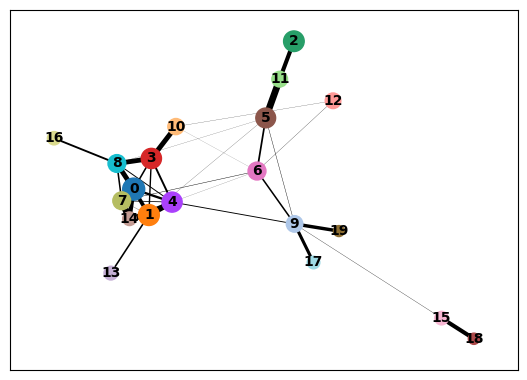

In [111]:
sc.pl.paga(adata)

In [112]:
sc.tl.draw_graph(adata, init_pos='paga', random_state=123)

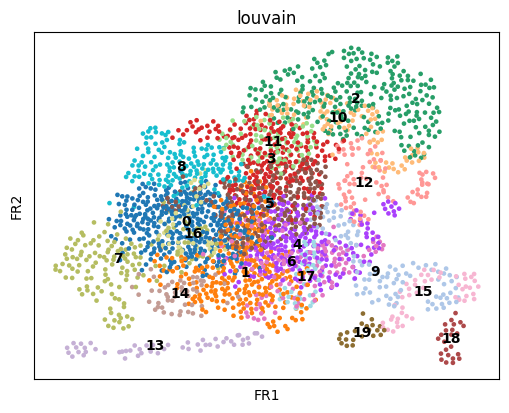

In [113]:
sc.pl.draw_graph(adata, color='louvain', legend_loc='on data')

# 9. Check data
## 9.1. Visualize marker gene expression

In [114]:
plt.rcParams["figure.figsize"] = [4.5, 4.5]

In [116]:
print(adata.var_names)

Index(['Hes4', 'Scnn1d', 'Cptp', 'Al590822.2', 'Linc00982', 'Rnf207', 'Acot7',
       'Uts2', 'H6pd', 'Spsb1',
       ...
       'Mt-nd2', 'Mt-co1', 'Mt-co2', 'Mt-atp6', 'Mt-co3', 'Mt-nd3', 'Mt-nd4',
       'Mt-nd5', 'Mt-cyb', 'Ac007325.4'],
      dtype='object', name='gene', length=1999)


In [130]:
# 去除可能的多余字符
#adata.var_names = adata.var_names.str.strip('''')

In [122]:
print(adata.var_names[:10])

Index(['Hes4', 'Scnn1d', 'Cptp', 'Al590822.2', 'Linc00982', 'Rnf207', 'Acot7',
       'Uts2', 'H6pd', 'Spsb1'],
      dtype='object', name='gene')


In [117]:
print(adata.obs.columns)

Index(['n_counts_all', 'n_counts', 'louvain'], dtype='object')


In [135]:
markers = {
    "Erythroids": ["Gata1", "Klf1", "Gypa", "Hba-a2"],
    "Megakaryocytes": ["Itga2b", "Pbx1", "Sdpr", "Vwf"],
    "Granulocytes": ["Elane", "Cebpe", "Ctsg", "Mpo", "Gfi1"],
    "Monocytes": ["Irf8", "Csf1r", "Ctsg", "Mpo"],
    "Mast_cells": ["Cma1", "Gzmb", "Kit"],
    "Basophils": ["Mcpt8", "Prss34"],
    "lym":["Hlf"]
}

# 检查每个细胞类型的标记基因是否存在于 adata.var 中
for cell_type, genes in markers.items():
    missing_genes = [gene for gene in genes if gene not in adata.var.index]
    if missing_genes:
        print(f"Missing genes for {cell_type}: {missing_genes}")

Missing genes for Erythroids: ['Gata1', 'Klf1', 'Hba-a2']
Missing genes for Megakaryocytes: ['Sdpr', 'Vwf']
Missing genes for Granulocytes: ['Cebpe']
Missing genes for Monocytes: ['Irf8']
Missing genes for Mast_cells: ['Cma1', 'Gzmb', 'Kit']
Missing genes for Basophils: ['Mcpt8', 'Prss34']
Missing genes for lym: ['Hlf']


marker gene of Erythroids


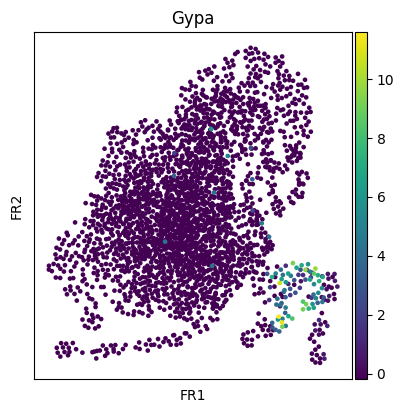

marker gene of Megakaryocytes


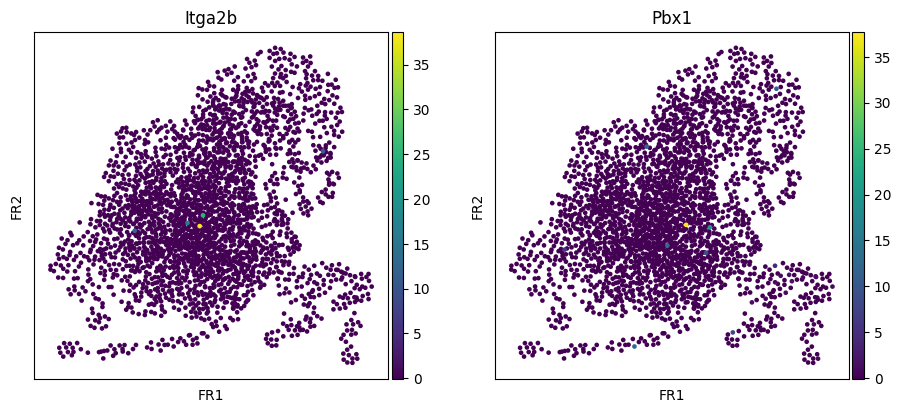

marker gene of Granulocytes


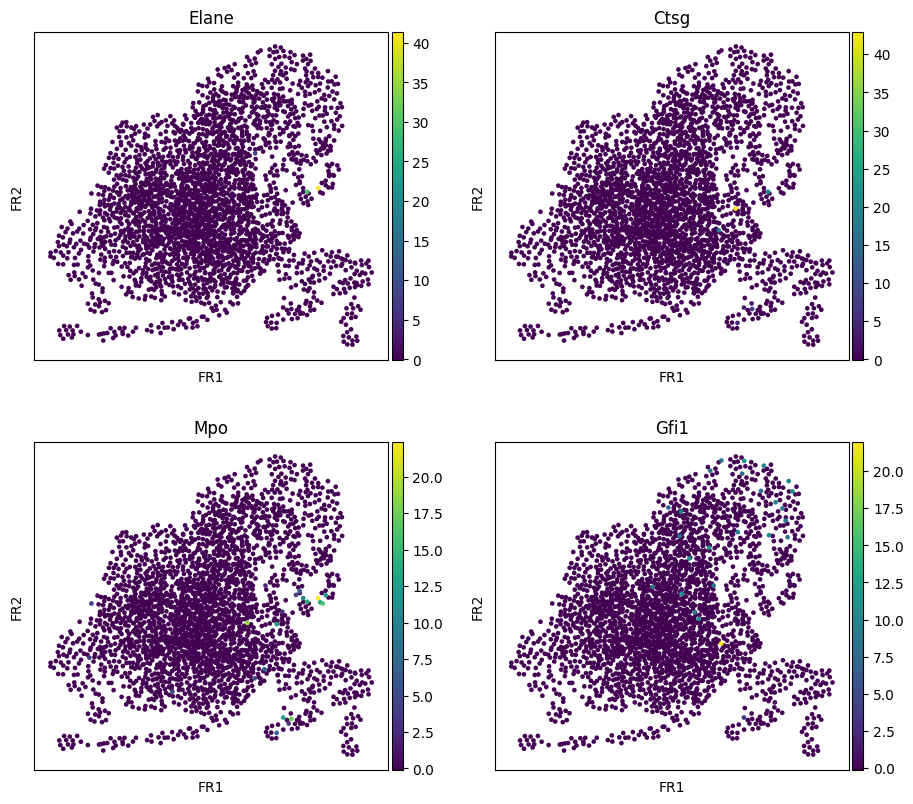

marker gene of Monocytes


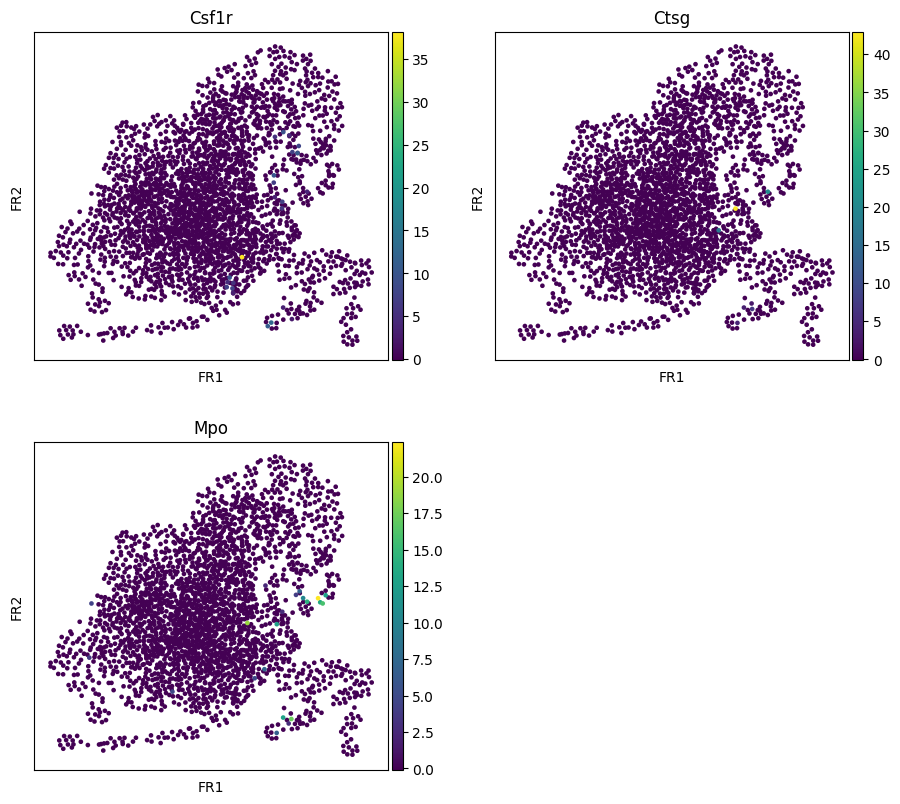

In [124]:
markers = {"Erythroids":["Gypa"],
           "Megakaryocytes":["Itga2b", "Pbx1"],
            "Granulocytes":["Elane", "Ctsg", "Mpo", "Gfi1"],
            "Monocytes":["Csf1r", "Ctsg", "Mpo"],
            }

for cell_type, genes in markers.items():
    print(f"marker gene of {cell_type}")
    sc.pl.draw_graph(adata, color=genes, use_raw=False, ncols=2)
    plt.show()



# 10. [Optional step] Cluster annotation

We will annotate the clusters based on the marker gene expression.
总结：我觉得可能是数据质量差  所以上面的marker都不太能找到 所以导致分群工作十分难进行

## 10.1. Make annotation (1)
感觉是数据里面自带的标注
反正我这个肯定没有

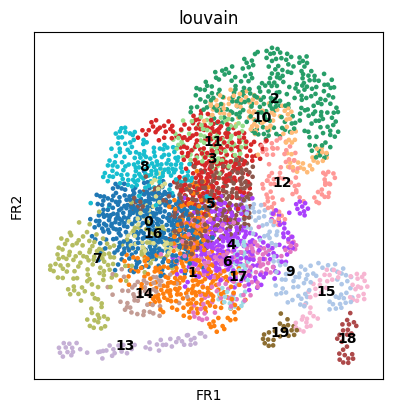

In [127]:
sc.pl.draw_graph(adata, color=['louvain', 'paul15_clusters'],
                 legend_loc='on data')

In [126]:
# Check current cluster name
cluster_list = adata.obs.louvain.unique()
cluster_list

['7', '2', '5', '12', '17', ..., '1', '15', '9', '18', '11']
Length: 20
Categories (20, object): ['0', '1', '2', '3', ..., '16', '17', '18', '19']

#### Attention!! Please change the dictionary below depending on the clustering results. The results may change depending on the execution environment.

其实就是根据上面的marker来标注细胞

In [22]:
# Make cluster anottation dictionary
annotation = {"MEP":[5],
              "Erythroids": [15, 10, 16, 9, 8, 14, 19, 3, 12, 18],
              "Megakaryocytes":[17, 22],  
              "GMP":[11, 1],
              "late_GMP" :[0],   
              "Granulocytes":[7, 13, 4],
              "Monocytes":[6, 2],
              "DC":[21],
              "Lymphoid":[20]}

# Change dictionary format
annotation_rev = {}
for i in cluster_list:
    for k in annotation:
        if int(i) in annotation[k]:
            annotation_rev[i] = k
            
# Check dictionary
annotation_rev

{'5': 'MEP',
 '2': 'Monocytes',
 '12': 'Erythroids',
 '13': 'Granulocytes',
 '0': 'late_GMP',
 '10': 'Erythroids',
 '3': 'Erythroids',
 '18': 'Erythroids',
 '11': 'GMP',
 '7': 'Granulocytes',
 '8': 'Erythroids',
 '22': 'Megakaryocytes',
 '16': 'Erythroids',
 '1': 'GMP',
 '17': 'Megakaryocytes',
 '4': 'Granulocytes',
 '19': 'Erythroids',
 '9': 'Erythroids',
 '6': 'Monocytes',
 '20': 'Lymphoid',
 '14': 'Erythroids',
 '15': 'Erythroids',
 '21': 'DC'}

In [23]:
adata.obs["cell_type"] = [annotation_rev[i] for i in adata.obs.louvain]

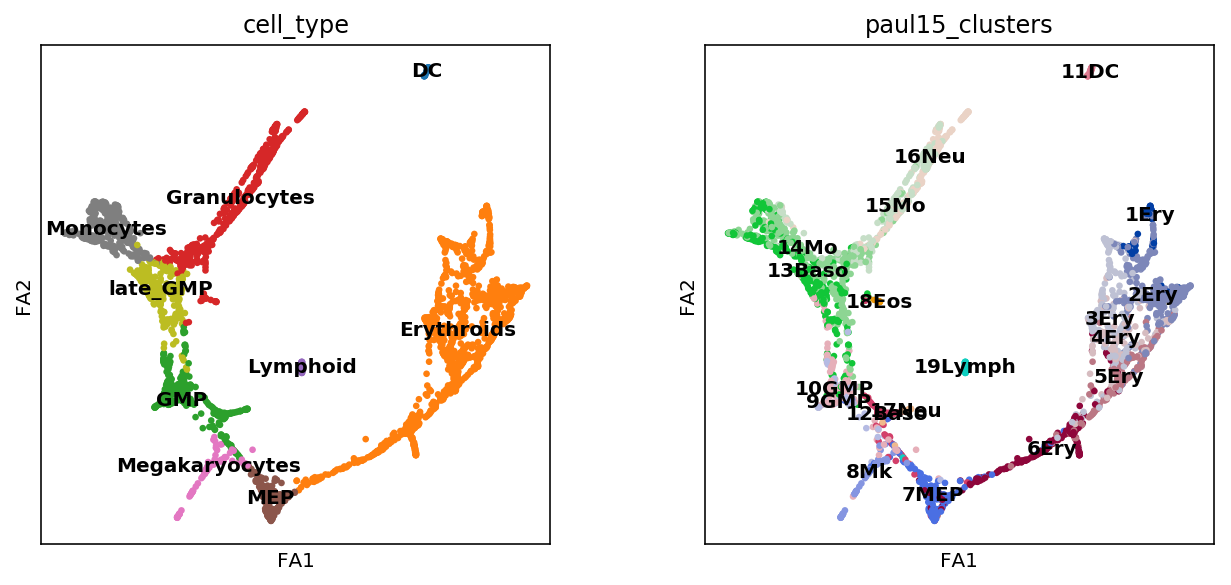

In [24]:
# check results
sc.pl.draw_graph(adata, color=['cell_type', 'paul15_clusters'],
                 legend_loc='on data')

## 10.2. Make annotation (2)
We'll also annotate the indivisual Louvain clusters.

KeyError: 'cell_type'

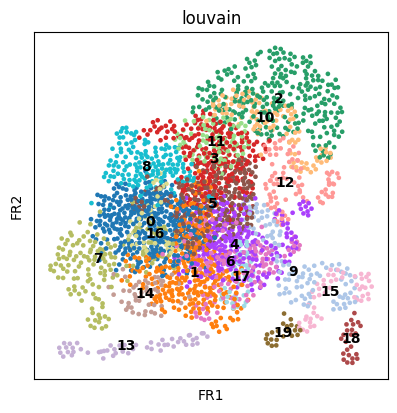

In [128]:
sc.pl.draw_graph(adata, color=['louvain', 'cell_type'],
                 legend_loc='on data')

#### !! Please change the dictionary below depending on the clustering results. The results may change depending on the execution environment.

In [26]:
annotation_2 = {'5': 'MEP_0',
                '15': 'Ery_0',
                '10': 'Ery_1',
                '16': 'Ery_2',
                '14': 'Ery_3',
                '9': 'Ery_4',
                '8': 'Ery_5',
                '19': 'Ery_6',
                '3': 'Ery_7',
                '12': 'Ery_8',
                '18': 'Ery_9',
                '17': 'Mk_0',
                '22': 'Mk_0',
                '11': 'GMP_0',
                '1': 'GMP_1',
                '0': 'GMPl_0',
                '7': 'Gran_0',
                '13': 'Gran_1',
                '4': 'Gran_2',
                '6': 'Mo_0',
                '2': 'Mo_1',
                '21': 'DC_0',
                '20': 'Lym_0'}

In [27]:
adata.obs["louvain_annot"] = [annotation_2[i] for i in adata.obs.louvain]

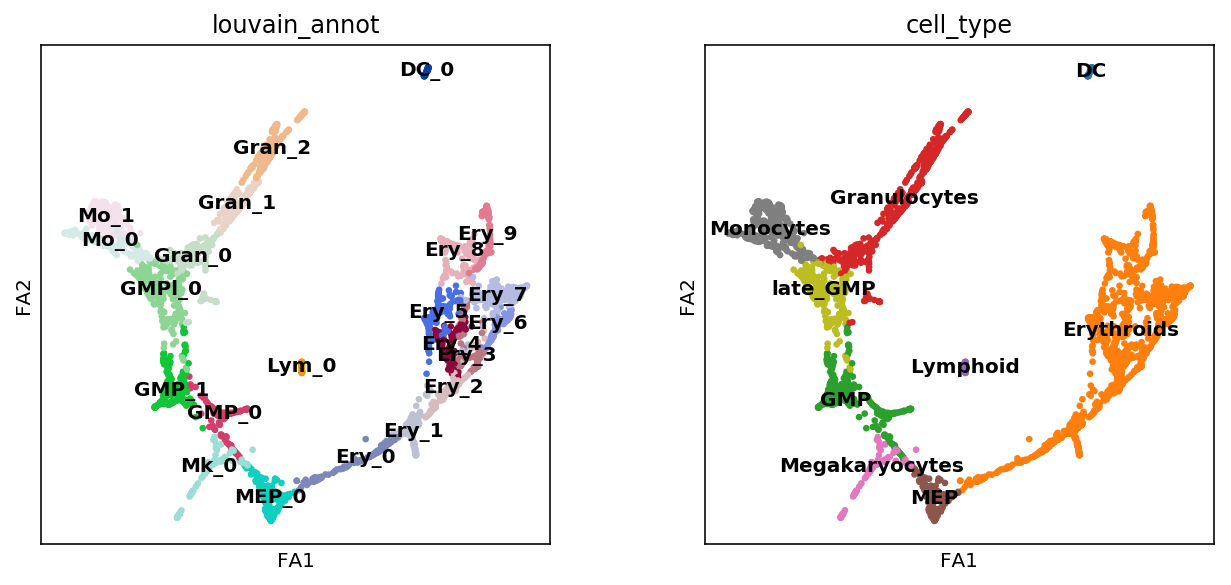

In [28]:
# Check result
sc.pl.draw_graph(adata, color=['louvain_annot', 'cell_type'],
                 legend_loc='on data')

# 11. [Optional step] Subset cells

During the CellOracle analysis, we will focus on the myeloid lineage. Since the othre clusters (i.e. the DC and lymphoid clusters) will not be analyzed, we will choose to remove them now.

It is also important to ensure that the differentiation trajectories are smoothly connected; CellOracle works best with continuous trajectories. If there is discrete cell cluster or non-related cell contamination, please remove them prior to celloracle analysis.

In [29]:
adata.obs.cell_type.unique()

[MEP, Monocytes, Erythroids, Granulocytes, late_GMP, GMP, Megakaryocytes, Lymphoid, DC]
Categories (9, object): [MEP, Monocytes, Erythroids, Granulocytes, ..., GMP, Megakaryocytes, Lymphoid, DC]

In [30]:
cell_of_interest = adata.obs.index[~adata.obs.cell_type.isin(["Lymphoid", "DC"])]
adata = adata[cell_of_interest, :]

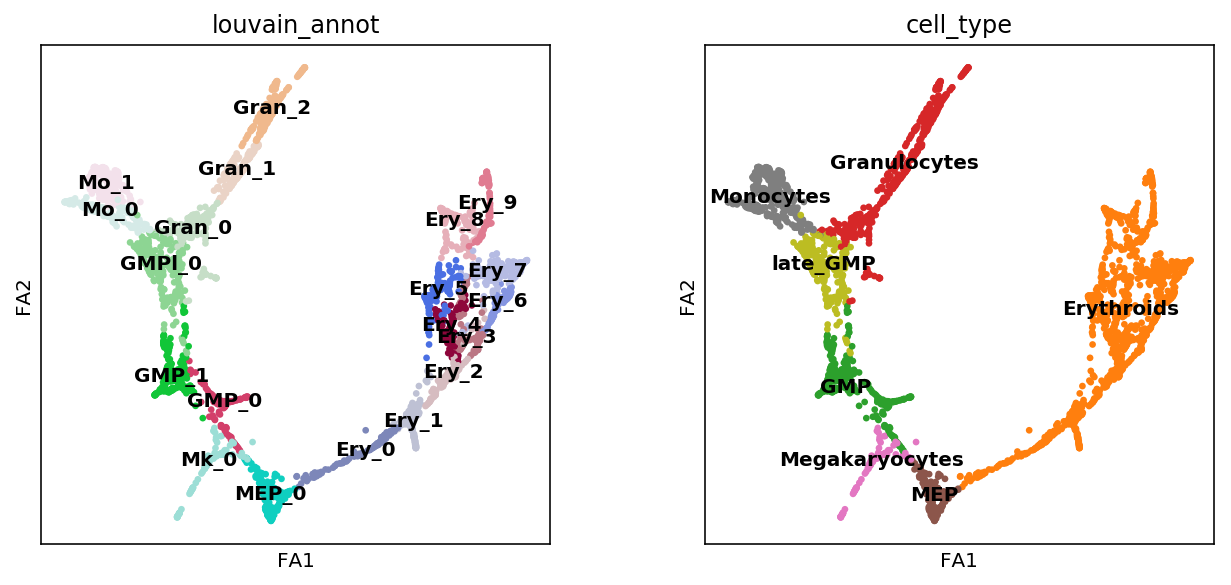

In [31]:
# check result
sc.pl.draw_graph(adata, color=['louvain_annot', 'cell_type'],
                 legend_loc='on data')

# 12. Save processed data

In [132]:
adata.write_h5ad("GSM4829413_unannotation.h5ad")